##1 - Carregamento e junção das bases:

###1.1 - Importando as bibliotecas:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

% matplotlib inline

start = time.time()


###1.2 - Importando as Bases de dados:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving stores.csv to stores (1).csv
Saving features.csv to features (1).csv


In [ ]:
features = pd.read_csv("features (1).csv")
stores = pd.read_csv("stores (1).csv")
train = pd.read_csv("train (1).csv")

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


###1.3 - União das bases de dados:

In [ ]:
df = train.merge(features, on=['Store','Date','IsHoliday']).sort_values(by=['Store','Date'])
df = df.merge(stores, on=['Store'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


##2 - Análise das variáveis:

###2.1 - Tratando alguns dados para analise:

####2.1 A - Dados de datas:

In [ ]:
#Date está como objeto. Vamos transformar para formato de data 
df['Date'] = pd.to_datetime(df['Date'], format="%Y/%m/%d") 

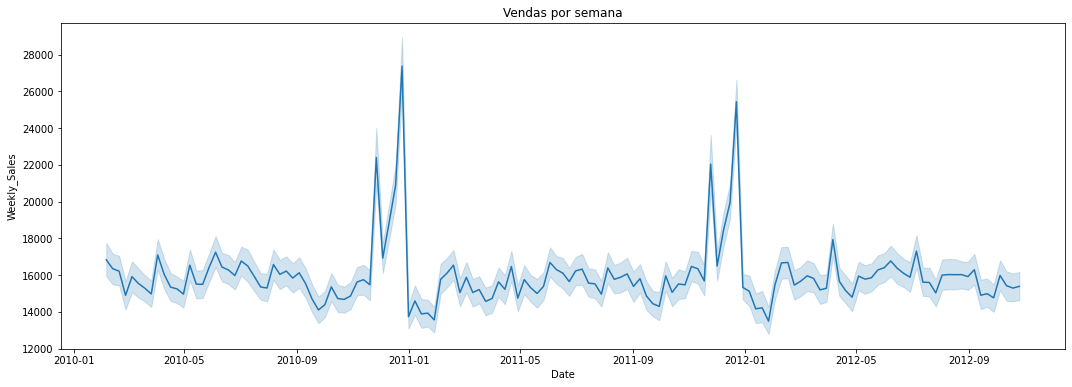

In [ ]:
#Plotando uma série temporal das vendas semanais 

plt.figure(figsize=(18,6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x="Date", y="Weekly_Sales")
plt.title('Vendas por semana')
plt.show()

Conseguimos ver uma sazonalidade muito grande nas vendas de fim de ano, possivelmente devido à Black Friday (novembro) e Natal (dezembro). É de interesse portanto criar variáveis dummies para essas datas.  

In [ ]:
#Range das datas 

print (df['Date'].min())
print (df['Date'].max())

2010-02-05 00:00:00
2012-10-26 00:00:00


###2.2 - Analise de nulos ou numeros que não fazem sentido:

###2.2 A: Observando valores nulos e negativos das vendas:

In [ ]:
#Observando valores nulos e negativos das vendas:

value = pd.DataFrame(df['Weekly_Sales'].value_counts(ascending=True))
value = value.reset_index()
value.sort_values(by='index', ascending=True)

,index,Weekly_Sales
10780,-4988.94,1
165607,-3924.00,1
109787,-1750.00,1
289441,-1699.00,1
6540,-1321.48,1
...,...,...
314873,474330.10,1
167710,627962.93,1
200933,630999.19,1
164972,649770.18,1


In [ ]:
mask = df['Weekly_Sales']>0

print('vendas totais (linhas): ', df.shape[0])
print('vendas não negativas e nulas: ', df[mask].shape[0])
print('observações com valores negativos ou nulos: ', df.shape[0] - df[mask].shape[0])
print('observações com vendas igual a zero: ', df[df['Weekly_Sales']==0].shape[0])

vendas totais (linhas):  421570
vendas não negativas e nulas:  420212
observações com valores negativos ou nulos:  1358
observações com vendas igual a zero:  73


**Conclusão:**
Como vendas negativas não fazem sentido, vamos substituir esses valores (que são 1285 observações, menos de 1% do dataset) pela média das vendas. Como só temos observações de 45 lojas, pode ser que existiram semanas que essas lojas ficaram fechadas. Dito isso, vamos deixar os valores 0 para Weekly Sales, e tratar somente os negativos.  

Para Trata-los substituimos os valores negativos pela média.

In [ ]:
#Substituindo as vendas negativas pela média das vendas
vendas_media = df['Weekly_Sales'].mean()
df.loc[df['Weekly_Sales'] < 0, 'Weekly_Sales'] = vendas_media

In [ ]:
df.shape

(421570, 16)

####2.2 B: Analise de nulos no dataframe principal 

In [ ]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

Explicação sobre os valores nulos nas variáveis MarkDown1,MarkDown2,MarkDown3,MarkDown4:
 - São valores relativos a promoções feitas por algumas lojas posteriormente ao ano de 2011. Portanto era esperado a presença de valores nulos.

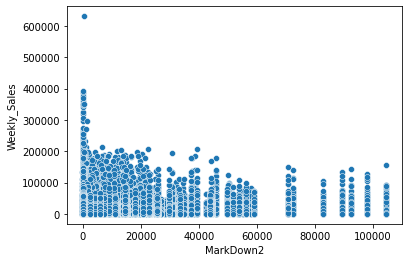

In [ ]:
#Tentando entender as variáveis de MarkDown 

sns.scatterplot(data=df, x="MarkDown2", y="Weekly_Sales")


#Quanto maior o valor de markdown, menos venda temos. Certamente é uma variável muito importante

Para tratá-los, preenchemos com 0 os valores nulos. Simbolizando que não havia promoção.

In [ ]:
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)

###2.3 - Analise dos tamanhos das bases:

In [ ]:
features.shape, stores.shape, train.shape, df.shape

((8190, 12), (45, 3), (421570, 5), (421570, 16))

###2.4 - Analise dos tipos de variáveis:

In [ ]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

###2.5 - Analises descritivas das variáveis numéricas:

In [ ]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,16030.180196,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22693.834084,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
1%,1.000000,1.000000,7.220000,18.300000,2.565000,0.000000,0.000000,0.000000,0.000000,0.000000,126.111903,4.156000,34875.000000
5%,3.000000,4.000000,67.500000,27.310000,2.653000,0.000000,0.000000,0.000000,0.000000,0.000000,126.496258,5.326000,39690.000000
25%,11.000000,18.000000,2130.877500,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7709.810000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
90%,40.000000,92.000000,42845.673000,83.580000,3.917000,8624.560000,452.880000,74.410000,2828.890000,5284.630000,219.444244,9.816000,204184.000000


###2.6 - Análise de correlação entre as variáveis:

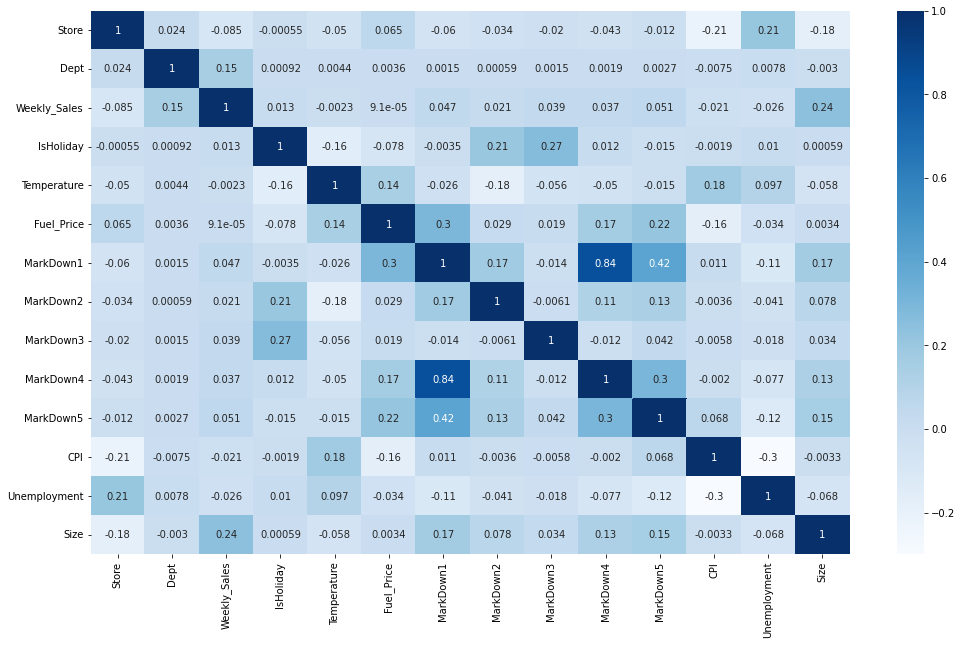

In [ ]:
p = df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(p, annot=True, cmap='Blues')

**Conclusão:**
Tirando uma correlação significativa (0.84) entre MarkDown1 e MarkDown4, as variáveis não parecem ser muito correlacionadas umas com as outras. Isso pode singificar que não teremos muitos problemas com multicolinearidade do modelo. 

###2.7 - Analise de Outliers:

Analisando os dados descritivos gerados anteriormente, a coluna "Weekly_Sales" parece conter bastante outliers. As promoções (MarkDowns) também. 

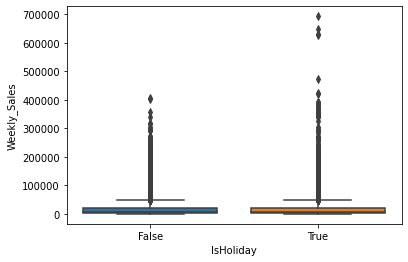

In [ ]:
sns.boxplot(x=df['IsHoliday'], y=df['Weekly_Sales'])

Nesse boxplot podemos perceber uma quantidade muito grande de outliers.  A coluna "IsHoliday" se mostra uma feature importante, por correlacionar com a quantidade de outliers nas vendas. 

###2.8 - Analise de histogramas das variaveis numericas:

<Figure size 432x288 with 0 Axes>

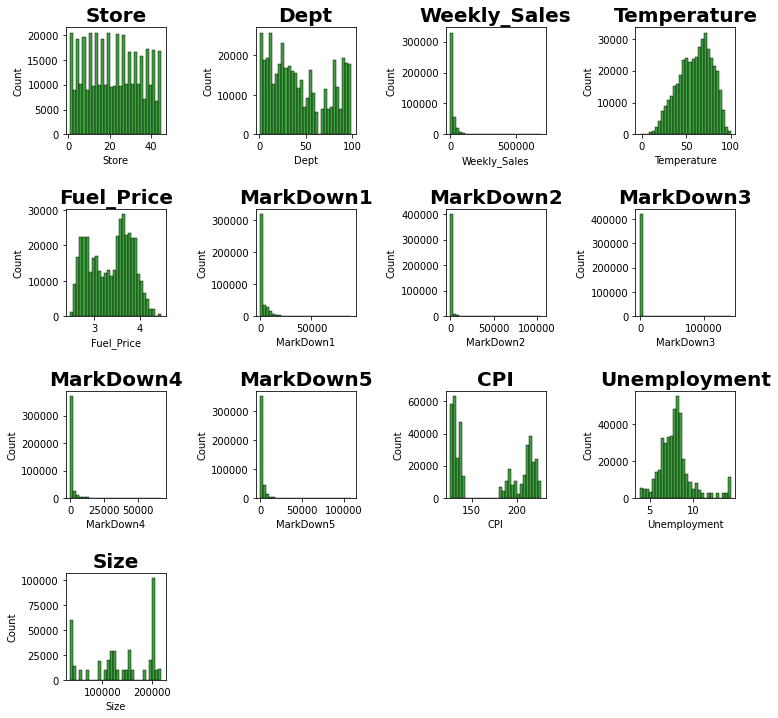

In [ ]:
#Plotando o histograma das variáveis 

#1 - definindo o número de linhas e colunas do plot 
colnames_number = df.select_dtypes(include='number').columns
ncols = 4
nrows = int(np.ceil(len(colnames_number)/ncols*1.0))

#2 - Fazendo um for para percorrer todos os axis e plotar as figuras

fig = plt.figure()
fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(12,12))   


counter = 0
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    
    if counter < len(colnames_number):
      sns.histplot(x = df.select_dtypes(include='number')[colnames_number[counter]], color='green', bins=30, ax=ax)
      #alternativamente, ao invés do seaborn podemos usar no matplotlib: 
      #ax.hist(x = df.select_dtypes(include='number')[colnames_number[counter]], bins=20, color='IndianRed') 
      ax.set_title(colnames_number[counter], fontsize=20, fontweight='bold')
    else:
      ax.set_axis_off()
    counter += 1 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.9, hspace=0.7)

fig.show()


##3 - Transformando algumas variáveis:

###3.1 - Analisando quais variáveis transformar com one hot encoding:

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


Precisamos usar one hot encoding em "Tipo de loja" 


Já em relação a coluna 'IsHoliday', transformamos em booleana.

Transformando a coluna "IsHoliday" em booleana:  

In [ ]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [ ]:
# replace Holiday
df['IsHoliday'] = df['IsHoliday'].replace({False:0, True:1})

Transformando a coluna Type_x com one hot encoding:

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


Criando dummys para a semana de black friday e para a semana de natal.

In [ ]:
from datetime import datetime
from datetime import timedelta

df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
df['Month'] = 'Month_' + df['Month'].map(str)
Month_dummies = pd.get_dummies(df['Month'] )

df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | (df['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | (df['DateType']==datetime(2010, 12, 24).date()) | (df['DateType']==datetime(2011, 12, 23).date()) | (df['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')
df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)
df['Pre_christmas'] = 'Pre_christmas_' + df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )

df = pd.concat([df,Pre_christmas_dummies,Black_Friday_dummies],axis=1) 

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,DateType,Month,Black_Friday,Pre_christmas,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,...,A,151315,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,1,0,1,0


In [ ]:
df = df.drop(columns=['DateType','Month', 'Black_Friday', 'Pre_christmas', 'Pre_christmas_no', 'Black_Friday_no'])
df = df.rename(columns={'Pre_christmas_yes':'christmas', 'Black_Friday_yes':'Black_Friday'})

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,christmas,Black_Friday
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0,0


In [ ]:
df['christmas'].value_counts()

0    415587
1      5983
Name: christmas, dtype: int64

In [ ]:
#Criando uma cópia do df

df_final = df.copy()


In [ ]:
type_colunas = pd.get_dummies(df_final['Type'])
for i in type_colunas.columns:
  df_final['Type_' + i] = type_colunas[i]
df_final.drop('Type',axis=1,inplace=True)

store_colunas = pd.get_dummies(df_final['Store'].astype(str))
for i in store_colunas.columns:
  df_final['Store_' + i] = store_colunas[i]

df_final.drop('Store',axis=1,inplace=True)

dept_colunas = pd.get_dummies(df_final['Dept'].astype(str))
for i in dept_colunas.columns:
  df_final['Dept_' + i] = dept_colunas[i]

df_final.drop('Dept',axis=1,inplace=True)



df_total = df_final.copy()
df_final.sample(5)

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
418227,2011-11-18,62.51,0,51.34,3.530,4240.34,132.96,111.71,270.14,7073.00,...,0,0,0,0,0,0,0,0,0,0
313663,2012-09-21,4471.04,0,63.49,3.765,7161.18,88.82,3.00,1011.45,5347.22,...,0,0,0,0,0,0,0,0,0,0
386207,2011-07-08,51456.94,0,68.49,3.540,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
63219,2011-04-08,489.16,0,30.64,3.532,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
173760,2011-11-25,18495.38,1,41.97,3.536,748.82,46.00,71366.86,19.00,577.40,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final.dtypes

Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Temperature            float64
Fuel_Price             float64
                     ...      
Dept_95                  uint8
Dept_96                  uint8
Dept_97                  uint8
Dept_98                  uint8
Dept_99                  uint8
Length: 144, dtype: object

###4.1 - Separando as variáveis que vamos utilizar no modelo:

In [ ]:
df_final = df_final.sample(10000, random_state = 42)

In [ ]:
# Separando a amostra de 1000 do df_final em train, test

X = df_final[df_final.columns[(df_final.columns != 'Date') & (df_final.columns != 'Weekly_Sales')]]
y =df_final['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

print(len(X_train))

800


###4.2 - Normalizando as variáveis do df_final para visualização de boxplots e histograma

In [ ]:
df_final.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
272342,2011-07-15,21577.44,0,88.10,3.692,0.00,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
176581,2012-08-31,8370.28,0,70.09,3.884,20913.04,7.98,98.98,9800.5,4527.8,...,0,0,0,0,0,0,0,0,0,0
354212,2010-04-09,4985.05,0,59.25,3.090,0.00,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
281444,2011-05-06,10512.26,0,53.63,4.078,0.00,0.00,0.00,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
124208,2011-10-28,40924.39,0,47.41,3.567,0.00,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Aplica a Normalização (StandardScaler) nos dados (IMPORTANTE QUE NÃO SEJA NOS CATEGÓRICOS)
scaler = StandardScaler()
colunas_scaler =['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                 'MarkDown4','MarkDown5','CPI','Unemployment','Size']
                 
scaler.fit(X_train[colunas_scaler])
X_train = X_train.reset_index().drop('index',axis=1)
X_test = X_test.reset_index().drop('index',axis=1)
y_train = y_train.reset_index().drop('index',axis=1)
y_test = y_test.reset_index().drop('index',axis=1)


X_train[colunas_scaler] = pd.DataFrame(scaler.transform(X_train[colunas_scaler]),columns=colunas_scaler)
X_train.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,0.878566,1.036276,0.352703,-0.169692,-0.101804,0.315267,0.317480,0.549007,0.322698,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.086572,1.201351,-0.318559,-0.185681,-0.102434,-0.279165,0.013889,-0.997780,-0.271368,...,0,0,0,0,0,0,1,0,0,0
2,1,-1.778897,-0.000393,-0.389373,-0.189013,-0.102752,-0.279165,-0.384493,-0.942395,0.109377,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.529927,0.589474,-0.389373,-0.189013,-0.102752,-0.279165,-0.384493,-0.747594,-0.187395,...,0,0,0,0,0,0,0,0,0,0
4,0,1.090907,0.494831,-0.136813,-0.189013,-0.044028,-0.256211,1.008888,1.423880,-1.317632,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test[colunas_scaler] = pd.DataFrame(scaler.transform(X_train[colunas_scaler]),columns=colunas_scaler)
X_test.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,-3.113841,-5.062078,-0.389316,-0.189066,-0.102769,-0.279076,-0.384410,-4.319389,-4.038286,...,0,0,0,0,0,0,0,0,0,0
1,0,-3.165333,-4.698749,-0.389424,-0.189071,-0.102769,-0.279244,-0.384490,-4.358882,-4.348131,...,0,0,0,0,0,0,0,0,0,0
2,0,-3.255622,-7.343783,-0.389435,-0.189072,-0.102769,-0.279244,-0.384595,-4.357468,-4.149547,...,0,0,0,0,0,0,0,0,0,0
3,0,-3.188987,-6.045488,-0.389435,-0.189072,-0.102769,-0.279244,-0.384595,-4.352494,-4.304334,...,0,0,0,0,0,0,0,0,0,0
4,0,-3.102512,-6.253797,-0.389395,-0.189072,-0.102759,-0.279238,-0.384227,-4.297052,-4.893829,...,0,0,0,0,0,1,0,0,0,0


##Treinamento e validação dos modelos

In [ ]:
# Treinamento e validação dos Modelos

models = {
    'LinearReg': LinearRegression(),
    'RidgeReg': Ridge(),
    'LassoReg': Lasso(),
    'ElasticNetReg': ElasticNet(),
    'HuberReg': HuberRegressor(),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'LassoLars': LassoLars(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVM_RBF':SVR(kernel='rbf'),
    'SVM_POLY':SVR(kernel='poly'),
    'SVM_LINEAR':SVR(kernel='linear',max_iter=10**4),
    'SVM_SIG':SVR(kernel='sigmoid'),
    'SGDRegressor':SGDRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor()
}

for model in models.values():
    model.fit(X_train, y_train);

eval = []
nome = []
r2 = []
MAE = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    nome.append(name)
    eval.append(metrics.mean_squared_error(y_test,y_pred))
    r2.append(metrics.r2_score(y_test,y_pred))
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))
    print('-------------------------')
    print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
    print('-------------------------')

-------------------------
LinearReg:
 R² : -7280754074984919334912.0000
 MSE: 3567857452728994389083459420160.0000
 MAE: 1722925249143243.5000
-------------------------
-------------------------
RidgeReg:
 R² : 0.3823
 MSE: 302678323.5849
 MAE: 13600.9356
-------------------------
-------------------------
LassoReg:
 R² : -0.3317
 MSE: 652580615.6398
 MAE: 21593.7054
-------------------------
-------------------------
ElasticNetReg:
 R² : 0.0636
 MSE: 458866718.4691
 MAE: 14387.7108
-------------------------
-------------------------
HuberReg:
 R² : 0.4979
 MSE: 246040415.1347
 MAE: 10037.0297
-------------------------
-------------------------
LassoCV:
 R² : 0.3615
 MSE: 312894479.0277
 MAE: 13886.8263
-------------------------
-------------------------
ElasticNetCV:
 R² : 0.0085
 MSE: 485854371.6847
 MAE: 15530.9648
-------------------------
-------------------------
LassoLars:
 R² : 0.5917
 MSE: 200079864.0012
 MAE: 10391.6979
-------------------------
-------------------------
Baye

In [ ]:
# Tabela de Métricas por Modelo

teste = pd.DataFrame({'Modelo': nome, 'MSE': eval, 'R2': r2, 'MAE':MAE})
teste.nsmallest(18,['MAE'])

,Modelo,MSE,R2,MAE
4,HuberReg,2.460404e+08,0.497917,10037.029692
7,LassoLars,2.000799e+08,0.591707,10391.697872
18,ExtraTreesRegressor,3.407080e+08,0.304734,10415.543089
15,RandomForestRegressor,2.866198e+08,0.415109,11099.606383
17,GradientBoostingRegressor,2.741211e+08,0.440614,11775.910827
12,SVM_LINEAR,5.600270e+08,-0.142820,13515.929924
13,SVM_SIG,5.546559e+08,-0.131859,13532.897694
11,SVM_POLY,5.553318e+08,-0.133239,13533.722641
10,SVM_RBF,5.544414e+08,-0.131422,13534.213731
1,RidgeReg,3.026783e+08,0.382339,13600.935550


##Utilizando o GridSearch para encontrar os melhores parâmetros

In [ ]:
# Fine Tuning 

parameters = {'loss':['squared_loss','huber'],
               'penalty':['l2', 'l1', 'elasticnet'],
               'alpha':[10**-7,10**-6,10**-4,1, 10, 0.002],
               'l1_ratio':[0.15, 0.3, 0.5],
               'max_iter':[10**3]
        }
reg = GridSearchCV(SGDRegressor(), parameters,n_jobs=-1)
reg.fit(X_train, y_train)

GridSearchCV(estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 0.0001, 1, 10, 0.002],
                         'l1_ratio': [0.15, 0.3, 0.5],
                         'loss': ['squared_loss', 'huber'], 'max_iter': [1000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
Reg_Best = reg.best_estimator_
Reg_Best

SGDRegressor(alpha=0.002, l1_ratio=0.5, loss='squared_loss')

##Cáculo das melhores métricas atingidas na análise micro

In [ ]:
Reg_Best.fit(X_train,y_train)
y_pred = Reg_Best.predict(X_test)
print('-------------------------')
print(name + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(metrics.r2_score(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
print('-------------------------')

-------------------------
ExtraTreesRegressor:
 R² : 0.1635
 MSE: 409923298.3827
 MAE: 16175.1805
-------------------------


##Treinamento em toda a massa de dados

In [ ]:
df_total = df_total ##.sample(10**4)

X = df_total[df_final.columns[(df_final.columns != 'Date') & (df_final.columns != 'Weekly_Sales')]]
y =df_total['Weekly_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)


scaler = StandardScaler()
colunas_scaler =['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                 'MarkDown4','MarkDown5','CPI','Unemployment','Size']
scaler.fit(X_train[colunas_scaler])
X_train = X_train.reset_index().drop('index',axis=1)
X_test = X_test.reset_index().drop('index',axis=1)


X_train[colunas_scaler] = pd.DataFrame(scaler.transform(X_train[colunas_scaler]),columns=colunas_scaler)
X_test[colunas_scaler] = pd.DataFrame(scaler.transform(X_test[colunas_scaler]),columns=colunas_scaler)



Reg_Best.fit(X_train,y_train)
y_pred = Reg_Best.predict(X_test)
print('-------------- Melhor Preditor --------------')
print(str(reg.best_estimator_) + ":\n R² : {:.4f}\n MSE: {:.4F}\n MAE: {:.4F}".format(Reg_Best.score(X_test, y_test),metrics.mean_squared_error(y_test,y_pred),metrics.mean_absolute_error(y_test,y_pred)))
print('---------------------------------------------')

-------------- Melhor Preditor --------------
SGDRegressor(alpha=0.002, l1_ratio=0.5, loss='squared_loss'):
 R² : 0.6435
 MSE: 186244358.7875
 MAE: 8175.5298
---------------------------------------------


In [ ]:
# Criando uma tabela com todos os valores e seus preditores

df_total_final = df_total
df_total[colunas_scaler] = pd.DataFrame(scaler.transform(df_total[colunas_scaler]),columns=colunas_scaler)
df_total_final['Previsto'] = Reg_Best.predict(df_total[df_final.columns[(df_final.columns != 'Date') & (df_final.columns != 'Weekly_Sales')]])
df_total_final.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Previsto
0,2010-02-05,24924.50,0,-0.96438,-1.721858,-0.42845,-0.173187,-0.084929,-0.278499,-0.395969,...,0,0,0,0,0,0,0,0,0,25571.920853
1,2010-02-05,50605.27,0,-0.96438,-1.721858,-0.42845,-0.173187,-0.084929,-0.278499,-0.395969,...,0,0,0,0,0,0,0,0,0,47245.921013
2,2010-02-05,13740.12,0,-0.96438,-1.721858,-0.42845,-0.173187,-0.084929,-0.278499,-0.395969,...,0,0,0,0,0,0,0,0,0,18914.878865
3,2010-02-05,39954.04,0,-0.96438,-1.721858,-0.42845,-0.173187,-0.084929,-0.278499,-0.395969,...,0,0,0,0,0,0,0,0,0,31540.313026
4,2010-02-05,32229.38,0,-0.96438,-1.721858,-0.42845,-0.173187,-0.084929,-0.278499,-0.395969,...,0,0,0,0,0,0,0,0,0,27285.304612


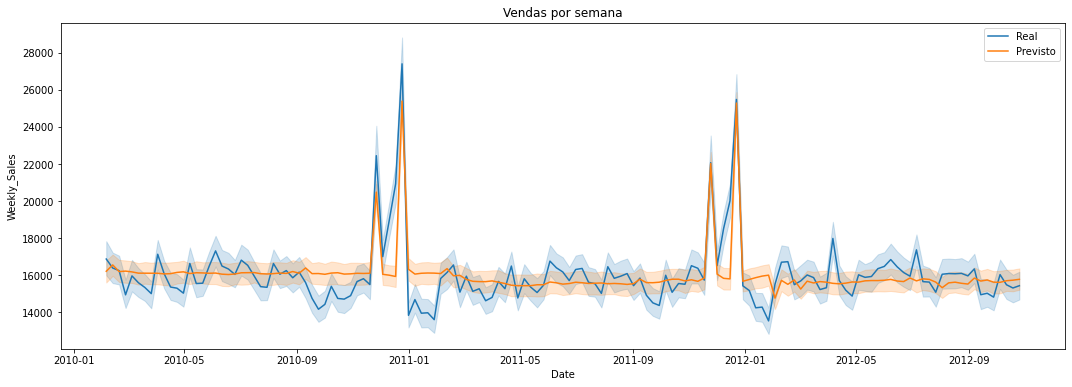

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_total_final, x="Date", y="Weekly_Sales",label='Real')
sns.lineplot(data=df_total_final, x="Date", y="Previsto",label='Previsto')
plt.title('Vendas por semana')
plt.show()

In [ ]:
(time.time() - start)/60

6.7717078963915505